In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2 as pg2
from collections import defaultdict

%matplotlib inline

In [30]:
from importlib import reload

In [130]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [131]:
from data_cleaning import data_cleaning as dc

In [133]:
reload(dc)

<module 'data_cleaning.data_cleaning' from '/Users/colinshanahan/galvanize/nhl-contract-predictions/data_cleaning/data_cleaning.py'>

In [34]:
df = dc.clean_data('../data/Contract_Details_PuckPedia_Mar_2019_Confidential_2.csv')

ValueError: invalid literal for int() with base 10: '?'

In [35]:
df = pd.read_csv('../data/Contract_Details_PuckPedia_Mar_2019_Confidential_2.csv')

In [9]:
df.head()

,player_id,first_name,last_name,position,birthdate,season,team_id,team_name,cap_hit,base_salary,...,signing_date,signing_team,length,value,contract_level,contract_id,expiry_status,contract_type,contract_end,ufa_year
0,103,Roberto,Luongo,Goaltender,4/4/79,2006-2007,14.0,Panthers,"$6,750,000","$6,000,000",...,6/29/06,Vancouver Canucks,4.0,"$27,000,000",standard_level,442,UFA,history,2009-2010,2006.0
1,103,Roberto,Luongo,Goaltender,4/4/79,2007-2008,14.0,Panthers,"$6,750,000","$6,500,000",...,6/29/06,Vancouver Canucks,4.0,"$27,000,000",standard_level,442,UFA,history,2009-2010,2006.0
2,103,Roberto,Luongo,Goaltender,4/4/79,2008-2009,14.0,Panthers,"$6,750,000","$7,000,000",...,6/29/06,Vancouver Canucks,4.0,"$27,000,000",standard_level,442,UFA,history,2009-2010,2006.0
3,103,Roberto,Luongo,Goaltender,4/4/79,2009-2010,14.0,Panthers,"$6,750,000","$7,500,000",...,6/29/06,Vancouver Canucks,4.0,"$27,000,000",standard_level,442,UFA,history,2009-2010,2006.0
4,103,Roberto,Luongo,Goaltender,4/4/79,2010-2011,14.0,Panthers,"$5,333,333","$10,000,000",...,9/2/09,NaN,12.0,"$63,999,996",standard_level,4124,UFA,current,2021-2022,2006.0


In [36]:
df.columns

Index(['player_id', 'first_name', 'last_name', 'position', 'birthdate',
       'season', 'team_id', 'team_name', 'cap_hit', 'base_salary', 'p_bonuses',
       's_bonuses', 'total_salary', 'active', 'buyout_id', 'signing_date',
       'signing_team', 'length', ' value ', 'contract_level', 'contract_id',
       'expiry_status', 'contract_type', 'contract_end', 'ufa_year'],
      dtype='object')

In [37]:
len(set(df.contract_id[df.contract_level != 'entry_level']))

2865

In [93]:
df[df.cap_hit == ' ? '][['first_name', 'last_name', 'contract_id', 'season']]

,first_name,last_name,contract_id,season
1303,Alexander,Radulov,2132,2011-2012


In [98]:
df[df.last_name == 'Tyutin']

,player_id,first_name,last_name,position,birthdate,season,team_id,team_name,cap_hit,base_salary,...,signing_date,signing_team,length,value,contract_level,contract_id,expiry_status,contract_type,contract_end,ufa_year
11107,17546,Fyodor,Tyutin,Defense,7/19/83,2006-2007,NaN,NaN,"$987,500","$950,000",...,8/2/06,NaN,2.0,"$1,975,000",standard_level,4235,RFA,history,2007-2008,2011.0
11108,17546,Fyodor,Tyutin,Defense,7/19/83,2007-2008,NaN,NaN,"$987,500","$1,025,000",...,8/2/06,NaN,2.0,"$1,975,000",standard_level,4235,RFA,history,2007-2008,2011.0
11109,17546,Fyodor,Tyutin,Defense,7/19/83,2008-2009,NaN,NaN,"$2,843,750","$2,250,000",...,2/17/08,NaN,4.0,"$11,375,000",standard_level,4233,UFA,history,2011-2012,2011.0
11110,17546,Fyodor,Tyutin,Defense,7/19/83,2009-2010,NaN,NaN,"$2,843,750","$2,700,000",...,2/17/08,NaN,4.0,"$11,375,000",standard_level,4233,UFA,history,2011-2012,2011.0
11111,17546,Fyodor,Tyutin,Defense,7/19/83,2010-2011,NaN,NaN,"$2,843,750","$3,000,000",...,2/17/08,NaN,4.0,"$11,375,000",standard_level,4233,UFA,history,2011-2012,2011.0
11112,17546,Fyodor,Tyutin,Defense,7/19/83,2011-2012,NaN,NaN,"$2,843,750","$3,425,000",...,2/17/08,NaN,4.0,"$11,375,000",standard_level,4233,UFA,history,2011-2012,2011.0
11113,17546,Fyodor,Tyutin,Defense,7/19/83,2012-2013,NaN,NaN,"$4,500,000","$4,000,000",...,8/31/11,NaN,6.0,"$27,000,000",standard_level,4234,UFA,history,2017-2018,2011.0
11114,17546,Fyodor,Tyutin,Defense,7/19/83,2013-2014,NaN,NaN,"$4,500,000","$4,500,000",...,8/31/11,NaN,6.0,"$27,000,000",standard_level,4234,UFA,history,2017-2018,2011.0
11115,17546,Fyodor,Tyutin,Defense,7/19/83,2014-2015,NaN,NaN,"$4,500,000","$4,750,000",...,8/31/11,NaN,6.0,"$27,000,000",standard_level,4234,UFA,history,2017-2018,2011.0
11116,17546,Fyodor,Tyutin,Defense,7/19/83,2015-2016,NaN,NaN,"$4,500,000","$5,000,000",...,8/31/11,NaN,6.0,"$27,000,000",standard_level,4234,UFA,history,2017-2018,2011.0


In [106]:
df['signing_year'] = pd.DatetimeIndex(df.signing_date).year

In [113]:
df.dropna(axis=0, subset=['signing_year'], inplace=True)

In [115]:
df.signing_year.value_counts(dropna=False)

2017.0    1568
2018.0    1516
2016.0    1412
2015.0    1191
2014.0    1067
2013.0    1017
2012.0     792
2011.0     692
2010.0     531
2009.0     432
2008.0     410
2007.0     316
2006.0     262
2019.0     169
2005.0      77
2004.0      14
2001.0       3
Name: signing_year, dtype: int64

In [123]:
df2 = clean_contracts_data()

/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:116: FutureWarning: 'contract_id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version


In [124]:
df2.shape

(2245, 28)

In [170]:
def clean_contracts_data2(file = None, goalies = False):
    #load in dataframe from csv
    if file:
        df = pd.read_csv(file)
    else:
        df = pd.read_csv('../data/Contract_Details_PuckPedia_Mar_2019_Confidential_2.csv')

    #Drop columns I won't be using
    df.drop(['buyout_id', 'base_salary', 'p_bonuses', 's_bonuses',
            'total_salary'], axis=1, inplace=True)

    #rename Total Value column to a format I prefer
    df['total_value'] = df[' value ']
    df.drop(' value ', axis=1, inplace=True)

    #create a column for full player name
    df['Player'] = df['first_name'] + ' ' + df['last_name']
    
    #set index to be contract_id
    df.set_index(df.contract_id, inplace=True)
    
    #drop column with missing cap hit/length (Alexander Radulov, contract no. 2132)
    df.drop(2132, inplace=True)

    #make a function to convert money strings to ints and apply
    money_to_int = lambda x: int(x.strip().strip('$()').replace(',', ''))
    df['cap_hit'] = df['cap_hit'].apply(money_to_int)
    df['total_value'] = df['total_value'].apply(money_to_int)

    #convert signing date and birthdate to date format and pull out the signing year
    df.signing_date = pd.to_datetime(df.signing_date)
    df.birthdate = pd.to_datetime(df.birthdate)
    df['signing_year'] = pd.DatetimeIndex(df.signing_date).year
    df.dropna(axis=0, subset=['signing_year'], inplace=True)

    #get age at contract signing_date (not accounting for leap days)
    df['signing_age'] = df.signing_date - df.birthdate
    df.signing_age = df.signing_age.apply(lambda x: x.days // 365)

    #convert signing_date to a date instead of a datetime
    df['signing_date'] = pd.DatetimeIndex(df['signing_date']).date

    #remove row that had NaN for signing year (Defenseman Fyodor Tyutin had
    #the contract listed in other rows also so no data is lost
#     df.drop(4236, axis=0, inplace=True)

    #Make signing year an int instead of a float
    df.signing_year = df.signing_year.apply(int)

    #Manually entered league salary cap history
    scap = {
            2005: 39000000,
            2006: 44000000,
            2007: 50300000,
            2008: 56700000,
            2009: 56800000,
            2010: 59400000,
            2011: 64300000,
            2012: 60000000,
            2013: 64300000,
            2014: 69000000,
            2015: 71400000,
            2016: 73000000,
            2017: 75000000,
            2018: 79500000,
            2019: 83000000,
           }

    #Drop any contracts signed before 2009 since I have no stats
    df = df[df.signing_year > 2009]
    
    #Add a column for the total salary cap in a contract's year signed
    df['signing_year_cap'] = df['signing_year'].apply(lambda x: scap[x])
    # and a column for the percentage of the cap in the year signed
    df['cap_pct'] = round(100 * df.cap_hit / df.signing_year_cap, 2)

    #convert birthdate to pandas datetime
    df.birthdate = pd.to_datetime(df.birthdate)

    #convert current season and contract_end to single year ints for ease of
    #calculations
    df.season = df.season.apply(lambda x: int(x[:4]))
    df.contract_end = df.contract_end.apply(lambda x: int(x[:4]))

    #Drop some non-standard situations (i.e. suspensions, season-opening IR,
    # salary retention adjustments)
    df.drop(df[df.first_name.map(len) > 15].index, inplace=True)

    #Drop one extremely young player
    df.drop(df[df.ufa_year > 2030].index, inplace = True)

    #Drop where ufa_year is null
    df.drop(df[df.ufa_year.isnull()].index, inplace=True)
    #Turn the remaining ufa years into integers
    df.ufa_year = df.ufa_year.apply(int)

    #Drop any contracts less than league minimum in 2009
    #df.drop(df[df.cap_hit < 500000].index, inplace=True)

    #Replace the position names for two players whose positions don't match the rest
    df.replace(['RW', 'LW'], ['Right Wing', 'Left Wing'], inplace=True)

    #add dummy variables for positions
    df['skater'] = df.position != 'Goaltender'
    df['forward'] = (df.position != 'Goaltender') & (df.position != 'Defense')
    df.replace([True, False], [1, 0], inplace=True)

    #drop entry level contracts
    df.drop(df[df.contract_level == 'entry_level'].index, inplace=True)

    #Add a column for whether the contract was signed as UFA or RFA
    df['signing_status'] = df['signing_year'] >= df['ufa_year']
    df['signing_status'] = df['signing_status'].apply(ufa_check)

    #eliminate duplicate rows with the same contract
    df = df.groupby('contract_id').head(1)

    #eliminate goalie contracts
    if goalies == False:
        df = df[df.position != 'Goaltender']

    return df

#auxillary function to check if contract was signed as UFA or RFA
def ufa_check(x):
    if x == True:
        return 'UFA'
    else:
        return 'RFA'

In [155]:
test = clean_contracts_data()

/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:116: FutureWarning: 'contract_id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version


In [156]:
test.shape

(2245, 28)

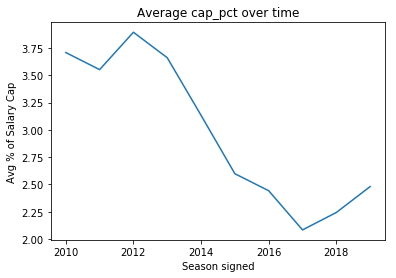

In [127]:
avg_cap_pct = df2.groupby('signing_year')['cap_pct'].mean()
plt.plot(avg_cap_pct)
plt.title('Average cap_pct over time')
plt.xlabel('Season signed')
plt.ylabel('Avg % of Salary Cap')
plt.show()

In [128]:
df2[df2.signing_year > 2014].shape

(1475, 28)

In [138]:
from models import clustering as cl

In [139]:
reload(cl)

<module 'models.clustering' from '/Users/colinshanahan/galvanize/nhl-contract-predictions/models/clustering.py'>

In [150]:
reload(dc)

<module 'data_cleaning.data_cleaning' from '/Users/colinshanahan/galvanize/nhl-contract-predictions/data_cleaning/data_cleaning.py'>

In [151]:
df = dc.clean_contracts_data2()

/Users/colinshanahan/galvanize/nhl-contract-predictions/data_cleaning/data_cleaning.py:235: FutureWarning: 'contract_id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  df = df.groupby('contract_id').head(1)


In [152]:
df2 = dc.clean_features_data()

/Users/colinshanahan/galvanize/nhl-contract-predictions/data_cleaning/data_cleaning.py:235: FutureWarning: 'contract_id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  df = df.groupby('contract_id').head(1)
/Users/colinshanahan/galvanize/nhl-contract-predictions/data_cleaning/data_cleaning.py:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  allstats[player].sort_values(by='Season', inplace=True)
/Users/colinshanahan/galvanize/nhl-contract-predictions/data_cleaning/data_cleaning.py:324: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view

In [ ]:
df2.dropna()

In [153]:
df2.shape

(1170, 227)

In [149]:
df2.sample(10)

,player_id,first_name,last_name,position,birthdate,season,team_id,team_name,cap_hit,active,...,mean Goals/60,Shots/60,mean Shots/60,Hits/60,mean Hits/60,PIM/60,mean PIM/60,Penalties Drawn/60,mean Penalties Drawn/60,mean Faceoffs pct
Season_Player,,,,,,,,,,,,,,,,,,,,,
2015 Matt Puempel,4393,Matt,Puempel,Left Wing,1993-01-24,2016,2.0,Red Wings,900000,1.0,...,0.601202,5.292028,6.012024,3.663712,4.058116,1.831856,2.555110,0.407079,0.300601,0.500000
2014 Brock Nelson,3901,Brock,Nelson,Center,1991-10-15,2015,4.0,Islanders,2500000,1.0,...,0.875800,8.752937,8.294337,4.560741,4.456274,1.105634,0.927317,1.197770,1.107629,0.773050
2015 Zemgus Girgensons,4788,Zemgus,Girgensons,Center,1994-01-05,2016,10.0,Sabres,1150000,1.0,...,0.544870,6.182264,6.175194,7.025300,7.501044,1.124048,1.071578,1.517465,1.216876,0.785714
2015 Matt Nieto,4416,Matt,Nieto,Left Wing,1992-11-05,2016,1.0,Avalanche,735000,1.0,...,0.577492,6.124650,7.198028,2.245705,1.319982,0.680517,0.948737,0.816620,0.680616,0.333333
2016 Alex Galchenyuk,4777,Alex,Galchenyuk,Center,1994-02-12,2017,19.0,Coyotes,4900000,1.0,...,1.110716,6.421623,7.758434,2.222869,3.133214,1.481913,1.375962,0.432225,0.812315,0.841176
2015 Sam Gagner,2651,Sam,Gagner,Center,1989-08-10,2016,24.0,Oilers,650000,1.0,...,0.588851,7.105424,7.369561,1.388416,2.016369,2.041789,1.677333,0.571701,0.374723,0.858883
2016 Gabriel Dumont,3670,Gabriel,Dumont,Center,1990-10-06,2017,17.0,Lightning,650000,0.0,...,0.286978,5.409462,5.596073,13.205451,13.487970,4.613953,4.161182,2.704731,2.582803,1.267241
2014 Ryan Spooner,3916,Ryan,Spooner,Center,1992-01-30,2015,26.0,Canucks,950000,1.0,...,0.637690,10.388994,9.485646,2.419355,2.231917,0.284630,0.637690,0.284630,0.398557,0.776256
2015 Gabriel Bourque,3791,Gabriel,Bourque,Left Wing,1990-09-23,2016,1.0,Avalanche,800000,1.0,...,0.367055,5.514361,5.901121,12.131595,7.510518,3.970340,1.016461,1.102872,0.621171,0.600000


In [175]:
def clean_features_data(df = None):

    if type(df) == None:
        #read in player season total stats from SQL
        conn = pg2.connect(dbname='nhl', user='postgres', host='localhost', port='5435')
        cur = conn.cursor()
        query = '''
                SELECT *
                FROM pst;
                '''
        cur.execute(query)
        pst = list(cur)

        pst_cols = ['Season_Player', 'Player', 'Season', 'Position', 'GP', 'TOI', 'Goals',
                    'Total Assists', 'First Assists', 'Second Assists', 'Total Points',
                   'IPP', 'Shots', 'SH%', 'iCF', 'iFF', 'iSCF', 'iHDCF', 'Rush Attempts',
                   'Rebounds Created', 'PIM', 'Total Penalties', 'Minor', 'Major',
                   'Misconduct', 'Penalties Drawn', 'Giveaways', 'Takeaways', 'Hits',
                   'Hits Taken', 'Shots Blocked', 'Faceoffs Won', 'Faceoffs Lost',
                   'Faceoffs %'
                    ]

        df = pd.DataFrame(pst, columns = pst_cols)

    dfsummable = df.drop(['SH%', 'Faceoffs %', 'IPP'], axis=1)

    summable_stats = ['GP', 'TOI', 'Goals',
                'Total Assists', 'First Assists', 'Second Assists', 'Total Points',
               'Shots', 'iCF', 'iFF', 'iSCF', 'iHDCF', 'Rush Attempts',
               'Rebounds Created', 'PIM', 'Total Penalties', 'Minor', 'Major',
               'Misconduct', 'Penalties Drawn', 'Giveaways', 'Takeaways', 'Hits',
               'Hits Taken', 'Shots Blocked', 'Faceoffs Won', 'Faceoffs Lost']

    #read in on_ice relative stats per season and over 3 year window
    oirel = pd.read_csv('../data/all_oirel.csv')
    woirel = pd.read_csv('../data/all_woirel.csv')

    #fix column labeling
    oirel['Season'] = oirel['Unnamed: 0.1']
    oirel.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
    woirel['Season'] = woirel['Unnamed: 0.1']
    woirel.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

    #set indices to be season/player combo
    oirel['Season_Player'] = oirel.Season.apply(str)
    oirel.Season_Player = oirel.Season_Player + ' ' + oirel.Player
    woirel['Season_Player'] = woirel.Season.apply(str)
    woirel.Season_Player = woirel.Season_Player + ' ' + woirel.Player
    oirel.set_index(oirel.Season_Player, inplace=True)
    woirel.set_index(woirel.Season_Player, inplace=True)

    #read in target data to narrow down required player seasons
    contracts = clean_contracts_data2()

    #set up default dictionaries to hold individual player stats
    allstats = defaultdict(pd.DataFrame)
    allsumstats = defaultdict(pd.DataFrame)
    allmeanstats = defaultdict(pd.DataFrame)

    #Give each player it's own data frame of stats all linked together in a dictionary with
    #player names as keys
    #Take season total stats and aggregate them over a 3 year window
    for player in contracts['Player'].unique():
        allstats[player] = dfsummable[df.Player == player]
        allstats[player].sort_values(by='Season', inplace=True)
        allstats[player]['Season_index'] = pd.date_range(end='2018',
                                                   periods = allstats[player].shape[0],
                                                   freq='Y')
        allstats[player].set_index(allstats[player].Season_index, inplace=True)
        allsumstats[player] = (allstats[player][summable_stats].rolling(window=3, min_periods=1)
                      .agg(np.sum))
        allmeanstats[player] = (allstats[player][summable_stats].rolling(window=3, min_periods=1)
                  .agg(np.mean))
        allmeanstats[player]['SH%'] = allsumstats[player]['Shots'] / allsumstats[player]['Goals']
        allmeanstats[player]['Faceoffs %'] = allsumstats[player]['Faceoffs Won'] / (
        allsumstats[player]['Faceoffs Won'] + allsumstats[player]['Faceoffs Lost'])

    scols, mcols = [], []
    #Relabeling sum and mean columns for clarity, arbitrarily using Hertl for convenience,
    #could be any player
    for i in allsumstats['Tomas Hertl'].columns:
        scols.append('sum '+i)
    for i in allmeanstats['Tomas Hertl'].columns:
        mcols.append('mean '+i)
    for p in allstats:
        allsumstats[p].columns = scols
        allmeanstats[p].columns = mcols
        allstats[p] = pd.concat([allstats[p], allsumstats[p], allmeanstats[p]], axis=1)

    #get a combined dataframe with all relevant player/contract years
    players = list(allstats.keys())
    allallstats = pd.DataFrame()

    for p in players:
        allallstats = pd.concat([allallstats, allstats[p].set_index(allstats[p].Season_Player)])

    #drop duplicate column names
    m_oirel = oirel.drop(['Player', 'Team', 'Position', 'GP', 'TOI', 'Season'], axis=1)
    m_woirel = woirel.drop(['Player', 'Team', 'Position', 'GP', 'TOI', 'Season'], axis=1)

    #relabel 3yr window columns for clarity
    wcols = []
    for i in m_woirel.columns:
        wcols.append('3yr ' + i)
    m_woirel.columns = wcols

    #merge on ice relative stats to the other stats
    allallstats = pd.merge(allallstats, m_oirel, on = 'Season_Player')
    allallstats = pd.merge(allallstats, m_woirel, on = 'Season_Player')

    #remove contracts signed before 2010 (lack of stats)
    #set contract_id to be the index for contracts
    table = contracts[contracts.signing_year > 2009].set_index('contract_id')

    #add column to line up contract years and stats years
    table['year_match'] = table.signing_year - 1

    #merge contracts and stats into a single table
    table = pd.merge(table, allallstats,
                how = 'left', left_on = ['Player', 'year_match'],
                right_on = ['Player', 'Season'])
    #drop rows that had missing seasons / indexing issues leading to NaNs
    #1700 rows down to 1440
    table.dropna(inplace=True)

    #Only take contracts signed after 2013 to eliminate survivorship bias in older
    #contracts. 1440 rows down to 1170.
    table = table[table.Season > 2013]

    #bring back IPP stat
    df = pd.merge(table, df[['Season_Player', 'IPP']], how='left', on = 'Season_Player')

    #drop duplicate Position column
    df.drop('Position', axis=1, inplace=True)

    #set index to be player/season
    df.set_index(df['Season_Player'], inplace=True)

    #extra feature engineering
    df['Giveaways/60'] = (df['Giveaways'] / df['TOI']) * 60
    df['mean Giveaways/60'] = (df['sum Giveaways'] / df['sum TOI']) * 60
    df['Takeaways/60'] = (df['Takeaways'] / df['TOI']) * 60
    df['mean Takeaways/60'] = (df['sum Takeaways'] / df['sum TOI']) * 60
    df['Shots Blocked/60'] = (df['Shots Blocked']/df['TOI']) * 60
    df['mean Shots Blocked/60'] = (df['sum Shots Blocked'] / df['sum TOI']) * 60
    df['mean Total Points/60'] = (df['sum Total Points']/df['sum TOI']) * 60
    df['Total Points/60'] = (df['Total Points']/df['TOI']) * 60
    df['Goals/60'] = (df['Goals']/df['TOI']) * 60
    df['mean Goals/60'] = (df['sum Goals']/df['sum TOI']) * 60
    df['Shots/60'] = (df['Shots']/df['TOI']) * 60
    df['mean Shots/60'] = (df['sum Shots']/df['sum TOI']) * 60
    df['Hits/60'] = (df['Hits']/df['TOI']) * 60
    df['mean Hits/60'] = (df['sum Hits']/df['sum TOI']) * 60
    df['PIM/60'] = (df['PIM']/df['TOI']) * 60
    df['mean PIM/60'] = (df['sum PIM']/df['sum TOI']) * 60
    df['Penalties Drawn/60'] = (df['Penalties Drawn']/df['TOI']) * 60
    df['mean Penalties Drawn/60'] = (df['sum Penalties Drawn']/df['sum TOI']) * 60
    df['mean Faceoffs pct'] = (df['sum Faceoffs Won'] / df['sum Faceoffs Lost'])

    return df


In [178]:
#read in player season total stats from SQL
conn = pg2.connect(dbname='nhl', user='postgres', host='localhost', port='5435')
cur = conn.cursor()
query = '''
        SELECT *
        FROM pst;
        '''
cur.execute(query)
pst = list(cur)

pst_cols = ['Season_Player', 'Player', 'Season', 'Position', 'GP', 'TOI', 'Goals',
            'Total Assists', 'First Assists', 'Second Assists', 'Total Points',
           'IPP', 'Shots', 'SH%', 'iCF', 'iFF', 'iSCF', 'iHDCF', 'Rush Attempts',
           'Rebounds Created', 'PIM', 'Total Penalties', 'Minor', 'Major',
           'Misconduct', 'Penalties Drawn', 'Giveaways', 'Takeaways', 'Hits',
           'Hits Taken', 'Shots Blocked', 'Faceoffs Won', 'Faceoffs Lost',
           'Faceoffs %'
            ]

df = pd.DataFrame(pst, columns = pst_cols)

In [181]:
dfsummable = df.drop(['SH%', 'Faceoffs %', 'IPP'], axis=1)

summable_stats = ['GP', 'TOI', 'Goals',
            'Total Assists', 'First Assists', 'Second Assists', 'Total Points',
           'Shots', 'iCF', 'iFF', 'iSCF', 'iHDCF', 'Rush Attempts',
           'Rebounds Created', 'PIM', 'Total Penalties', 'Minor', 'Major',
           'Misconduct', 'Penalties Drawn', 'Giveaways', 'Takeaways', 'Hits',
           'Hits Taken', 'Shots Blocked', 'Faceoffs Won', 'Faceoffs Lost']

#read in on_ice relative stats per season and over 3 year window
oirel = pd.read_csv('../data/all_oirel.csv')
woirel = pd.read_csv('../data/all_woirel.csv')

#fix column labeling
oirel['Season'] = oirel['Unnamed: 0.1']
oirel.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
woirel['Season'] = woirel['Unnamed: 0.1']
woirel.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

#set indices to be season/player combo
oirel['Season_Player'] = oirel.Season.apply(str)
oirel.Season_Player = oirel.Season_Player + ' ' + oirel.Player
woirel['Season_Player'] = woirel.Season.apply(str)
woirel.Season_Player = woirel.Season_Player + ' ' + woirel.Player
oirel.set_index(oirel.Season_Player, inplace=True)
woirel.set_index(woirel.Season_Player, inplace=True)

In [184]:
#read in target data to narrow down required player seasons
contracts = clean_contracts_data2()

/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:116: FutureWarning: 'contract_id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version


In [186]:
#set up default dictionaries to hold individual player stats
allstats = defaultdict(pd.DataFrame)
allsumstats = defaultdict(pd.DataFrame)
allmeanstats = defaultdict(pd.DataFrame)

#Give each player it's own data frame of stats all linked together in a dictionary with
#player names as keys
#Take season total stats and aggregate them over a 3 year window
for player in contracts['Player'].unique():
    allstats[player] = dfsummable[df.Player == player]
    allstats[player].sort_values(by='Season', inplace=True)
    allstats[player]['Season_index'] = pd.date_range(end='2018',
                                               periods = allstats[player].shape[0],
                                               freq='Y')
    allstats[player].set_index(allstats[player].Season_index, inplace=True)
    allsumstats[player] = (allstats[player][summable_stats].rolling(window=3, min_periods=1)
                  .agg(np.sum))
    allmeanstats[player] = (allstats[player][summable_stats].rolling(window=3, min_periods=1)
              .agg(np.mean))
    allmeanstats[player]['SH%'] = allsumstats[player]['Shots'] / allsumstats[player]['Goals']
    allmeanstats[player]['Faceoffs %'] = allsumstats[player]['Faceoffs Won'] / (
    allsumstats[player]['Faceoffs Won'] + allsumstats[player]['Faceoffs Lost'])

/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [187]:
scols, mcols = [], []
#Relabeling sum and mean columns for clarity, arbitrarily using Hertl for convenience,
#could be any player
for i in allsumstats['Tomas Hertl'].columns:
    scols.append('sum '+i)
for i in allmeanstats['Tomas Hertl'].columns:
    mcols.append('mean '+i)
for p in allstats:
    allsumstats[p].columns = scols
    allmeanstats[p].columns = mcols
    allstats[p] = pd.concat([allstats[p], allsumstats[p], allmeanstats[p]], axis=1)



In [188]:
#get a combined dataframe with all relevant player/contract years
players = list(allstats.keys())
allallstats = pd.DataFrame()

for p in players:
    allallstats = pd.concat([allallstats, allstats[p].set_index(allstats[p].Season_Player)])

In [189]:
#drop duplicate column names
m_oirel = oirel.drop(['Player', 'Team', 'Position', 'GP', 'TOI', 'Season'], axis=1)
m_woirel = woirel.drop(['Player', 'Team', 'Position', 'GP', 'TOI', 'Season'], axis=1)

#relabel 3yr window columns for clarity
wcols = []
for i in m_woirel.columns:
    wcols.append('3yr ' + i)
m_woirel.columns = wcols

#merge on ice relative stats to the other stats
allallstats = pd.merge(allallstats, m_oirel, on = 'Season_Player')
allallstats = pd.merge(allallstats, m_woirel, on = 'Season_Player')



/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: 'Season_Player' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [200]:
allallstats.sample(10)

,Season_Player,Player,Season,Position,GP,TOI,Goals,Total Assists,First Assists,Second Assists,...,3yr Off. Zone Starts/60,3yr Neu. Zone Starts/60,3yr Def. Zone Starts/60,3yr On The Fly Starts/60,3yr Off. Zone Start %,3yr Off. Zone Faceoffs/60,3yr Neu. Zone Faceoffs/60,3yr Def. Zone Faceoffs/60,3yr Off. Zone Faceoff %,3yr Season_Player
426,2009 Nate Thompson,Nate Thompson,2009,C,71,951.3330,2,8,6,2,...,5.96,17.91,24.76,41.28,19.39,9.38,23.78,35.90,20.72,2009 Nate Thompson
2273,2012 Jordan Schroeder,Jordan Schroeder,2012,C,31,425.1000,3,6,5,1,...,14.54,12.99,4.80,46.72,75.18,22.58,18.35,11.57,66.12,2012 Jordan Schroeder
2791,2016 Tyler Pitlick,Tyler Pitlick,2016,"C, R",31,307.6500,8,3,2,1,...,9.82,13.17,8.67,50.85,53.13,16.64,19.53,17.80,48.32,2016 Tyler Pitlick
1673,2016 Cameron Gaunce,Cameron Gaunce,2016,D,12,150.2170,1,3,3,0,...,12.78,12.38,7.19,53.12,64.00,22.37,17.57,13.58,62.22,2016 Cameron Gaunce
1715,2016 Alec Martinez,Alec Martinez,2016,D,82,1774.5800,9,30,13,17,...,10.90,9.87,11.55,48.48,48.56,21.28,16.53,19.49,52.19,2016 Alec Martinez
3677,2014 Ben Street,Ben Street,2014,C,3,34.7833,0,0,0,0,...,12.28,16.76,12.04,52.65,50.49,19.83,20.54,19.83,50.0,2014 Ben Street
392,2009 Clarke MacArthur,Clarke MacArthur,2009,L,81,1190.1200,16,19,12,7,...,11.64,15.72,8.52,39.87,57.74,17.80,21.49,15.21,53.92,2009 Clarke MacArthur
3396,2013 Vladislav Namestnikov,Vladislav Namestnikov,2013,C,4,37.8833,0,0,0,0,...,4.75,15.84,7.92,61.77,37.50,7.92,22.17,14.25,35.71,2013 Vladislav Namestnikov
2341,2014 Eric Gryba,Eric Gryba,2014,D,75,1174.1200,0,12,7,5,...,6.61,12.67,14.08,44.65,31.94,13.81,19.72,25.14,35.45,2014 Eric Gryba
3283,2015 Gabriel Landeskog,Gabriel Landeskog,2015,L,75,1419.4300,20,33,18,15,...,13.23,12.47,8.92,39.48,59.73,24.60,17.25,17.46,58.49,2015 Gabriel Landeskog


In [201]:
#remove contracts signed before 2010 (lack of stats)
#set contract_id to be the index for contracts
table = contracts[contracts.signing_year > 2009].set_index('contract_id')

In [202]:
#add column to line up contract years and stats years
table['year_match'] = table.signing_year - 1

#merge contracts and stats into a single table
table = pd.merge(table, allallstats,
            how = 'left', left_on = ['Player', 'year_match'],
            right_on = ['Player', 'Season'])

In [203]:
table.shape

(2245, 208)

In [204]:
table.sample(10)

,player_id,first_name,last_name,position,birthdate,season,team_id,team_name,cap_hit,active,...,3yr Off. Zone Starts/60,3yr Neu. Zone Starts/60,3yr Def. Zone Starts/60,3yr On The Fly Starts/60,3yr Off. Zone Start %,3yr Off. Zone Faceoffs/60,3yr Neu. Zone Faceoffs/60,3yr Def. Zone Faceoffs/60,3yr Off. Zone Faceoff %,3yr Season_Player
1637,4581,Brett,Connolly,Right Wing,1992-05-02,2016,15.0,Capitals,850000,1.0,...,11.21,17.34,10.63,45.71,51.34,22.04,24.78,22.23,49.78,2015 Brett Connolly
292,1786,Chris,Stewart,Right Wing,1987-10-30,2015,NaN,NaN,1700000,1.0,...,13.62,12.85,7.37,45.02,64.90,21.85,19.40,16.05,57.65,2014 Chris Stewart
1053,3758,Craig,Smith,Right Wing,1989-09-05,2013,27.0,Predators,2000000,1.0,...,13.57,12.22,6.81,44.88,66.57,20.85,18.21,14.68,58.68,2011 Craig Smith
2128,6356,Dean,Kukan,Defense,1993-07-08,2017,30.0,Blue Jackets,700000,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1421,4333,Matt,Read,Right Wing,1986-06-14,2014,29.0,Wild,3625000,1.0,...,11.03,12.69,9.58,39.37,53.53,17.08,18.30,16.22,51.28,2012 Matt Read
600,2941,Kevin,Porter,Center,1986-03-12,2014,10.0,Sabres,600000,0.0,...,7.52,12.28,6.56,47.98,53.42,13.76,17.69,14.53,48.64,2013 Kevin Porter
891,3474,Tyler,Myers,Defense,1990-02-01,2012,28.0,Jets,5500000,1.0,...,9.09,11.97,11.43,38.01,44.30,19.92,19.70,20.31,49.52,2010 Tyler Myers
10,355,Brent,Burns,Defense,1985-03-09,2017,21.0,Sharks,8000000,1.0,...,10.21,10.04,6.93,33.86,59.57,24.67,19.01,18.78,56.77,2015 Brent Burns
1074,3791,Gabriel,Bourque,Left Wing,1990-09-23,2015,1.0,Avalanche,866250,1.0,...,9.41,14.95,11.62,49.50,44.75,15.96,20.15,21.60,42.48,2014 Gabriel Bourque
1633,4577,Scott,Wilson,Left Wing,1992-04-24,2016,10.0,Sabres,625000,1.0,...,7.95,17.78,6.32,50.30,55.74,15.44,22.46,11.46,57.39,2015 Scott Wilson


In [205]:
#Only take contracts signed after 2013 to eliminate survivorship bias in older
#contracts. 1440 rows down to 1170.
table = table[table.Season > 2013]

In [206]:
table.shape

(1170, 208)

In [196]:
#drop rows that had missing seasons / indexing issues leading to NaNs
#1700 rows down to 1440
table.dropna(inplace=True)

In [197]:
table.shape

(729, 208)

In [190]:
allallstats.shape

(4607, 181)

In [185]:
df.shape, contracts.shape

((9673, 34), (2245, 28))

In [176]:
test = clean_features_data(df)

/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:116: FutureWarning: 'contract_id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/colinshanahan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'Season

In [177]:
test.shape

(419, 227)